# Análisis Estadístico de los datos
En este notebook nos centraremos en analizar el archivo `OTUS_conservados.csv`

In [ ]:
#! pip install contextily geopandas matplotlib numpy pandas seaborn

In [26]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd 
import seaborn as sns

## Lectura de datos

In [5]:
data_path = "./data"

In [12]:
otus_con = pd.read_csv(f"{data_path}/OTUS_conservados.csv", index_col="X")
otus_con.head()

,New_Labels,Latitude,Longitude,X4457032,X4471583,X9560,X4468101,X198079,X101868,X4360511,...,X210657,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037
X,,,,,,,,,,,,,,,,,,,,,
1001.skm3,WarmT-SumDry-HotSum0,33.194,-117.241,0.003306,0.0,0.0,0.0,0.0,0.005785,0.00000,...,0.0,0.00000,0.004752,0.007231,0.000000,0.0,0.0,0.002273,0.00000,0.00000
1001.skd3,WarmT-SumDry-HotSum0,33.194,-117.241,0.002699,0.0,0.0,0.0,0.0,0.001080,0.00018,...,0.0,0.00000,0.003419,0.029872,0.000180,0.0,0.0,0.000720,0.00000,0.00000
1001.skm1,WarmT-SumDry-HotSum0,33.194,-117.241,0.001304,0.0,0.0,0.0,0.0,0.002934,0.00000,...,0.0,0.00000,0.004563,0.004563,0.000326,0.0,0.0,0.001304,0.00000,0.00000
1001.skb3,WarmT-SumDry-HotSum0,33.194,-117.241,0.009130,0.0,0.0,0.0,0.0,0.004966,0.00000,...,0.0,0.00016,0.004645,0.008169,0.000961,0.0,0.0,0.002243,0.00016,0.00032
1001.skm2,WarmT-SumDry-HotSum0,33.194,-117.241,0.001022,0.0,0.0,0.0,0.0,0.000341,0.00000,...,0.0,0.00000,0.005112,0.010907,0.000682,0.0,0.0,0.002045,0.00000,0.00000


## Información básica

In [13]:
otus_con.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3043 entries, 1001.skm3 to 1883.2011.37.crump.artic.ltreb.main.lane4.noindex
Columns: 606 entries, New_Labels to X716037
dtypes: float64(605), object(1)
memory usage: 14.1+ MB


In [14]:
otus_con.describe()

,Latitude,Longitude,X4457032,X4471583,X9560,X4468101,X198079,X101868,X4360511,X9961,...,X210657,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037
count,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,...,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000
mean,33.822004,-24.579033,0.028350,0.011897,0.007070,0.005470,0.004288,0.006789,0.008289,0.005080,...,0.000220,0.000277,0.000213,0.000202,0.000178,0.000141,0.000257,0.000382,0.000224,0.000250
std,26.945399,108.402100,0.047247,0.021712,0.023405,0.023034,0.019638,0.010962,0.045897,0.010931,...,0.001724,0.001035,0.001104,0.001442,0.000880,0.001277,0.002159,0.001897,0.001046,0.002174
min,-78.020000,-157.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.126000,-88.230357,0.000000,0.000018,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.840718,-79.889743,0.000496,0.000406,0.000510,0.000000,0.000029,0.000050,0.000000,0.000018,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.040000,100.772000,0.041019,0.013083,0.002140,0.000052,0.000735,0.011529,0.000000,0.004734,...,0.000000,0.000075,0.000032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000034,0.000010
max,78.880000,175.267000,0.278051,0.147730,0.337957,0.292853,0.253665,0.076220,0.551610,0.156280,...,0.029822,0.016826,0.020928,0.041119,0.014911,0.024844,0.063021,0.021151,0.011835,0.056970


**¿Las filas suman 1?**

In [21]:
conteo = otus_con[otus_con.columns[3:]].sum(axis=1)
otus_con.insert(
    loc=3,
    column="total_conteo",
    value=conteo
)
otus_con

,New_Labels,Latitude,Longitude,total_conteo,X4457032,X4471583,X9560,X4468101,X198079,X101868,...,X210657,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037
X,,,,,,,,,,,,,,,,,,,,,
1001.skm3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.446074,0.003306,0.000000,0.0,0.000000,0.0,0.005785,...,0.0,0.00000,0.004752,0.007231,0.000000,0.000000,0.0,0.002273,0.000000,0.00000
1001.skd3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.407234,0.002699,0.000000,0.0,0.000000,0.0,0.001080,...,0.0,0.00000,0.003419,0.029872,0.000180,0.000000,0.0,0.000720,0.000000,0.00000
1001.skm1,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.409387,0.001304,0.000000,0.0,0.000000,0.0,0.002934,...,0.0,0.00000,0.004563,0.004563,0.000326,0.000000,0.0,0.001304,0.000000,0.00000
1001.skb3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.482941,0.009130,0.000000,0.0,0.000000,0.0,0.004966,...,0.0,0.00016,0.004645,0.008169,0.000961,0.000000,0.0,0.002243,0.000160,0.00032
1001.skm2,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.435583,0.001022,0.000000,0.0,0.000000,0.0,0.000341,...,0.0,0.00000,0.005112,0.010907,0.000682,0.000000,0.0,0.002045,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883.2011.282.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.585839,-149.622223,0.520607,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.006404,0.0,0.000000,0.001601,0.00000
1883.2011.329.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.608533,-149.587633,0.510964,0.000110,0.000000,0.0,0.000028,0.0,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000248,0.00000
1883.2011.348.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.596883,-149.601250,0.479785,0.000528,0.000024,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000024,0.0,0.000000,0.000744,0.00000


In [22]:
otus_con.total_conteo.describe()

count    3043.000000
mean        0.469929
std         0.129135
min         0.000043
25%         0.384184
50%         0.468679
75%         0.544989
max         0.930663
Name: total_conteo, dtype: float64

## Mapas

In [25]:
otus_con_gdf = gpd.GeoDataFrame(otus_con.copy(), geometry=gpd.points_from_xy(otus_con['Longitude'], otus_con['Latitude']), crs='EPSG:4326')
otus_con_gdf

,New_Labels,Latitude,Longitude,total_conteo,X4457032,X4471583,X9560,X4468101,X198079,X101868,...,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037,geometry
X,,,,,,,,,,,,,,,,,,,,,
1001.skm3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.446074,0.003306,0.000000,0.0,0.000000,0.0,0.005785,...,0.00000,0.004752,0.007231,0.000000,0.000000,0.0,0.002273,0.000000,0.00000,POINT (-117.24100 33.19400)
1001.skd3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.407234,0.002699,0.000000,0.0,0.000000,0.0,0.001080,...,0.00000,0.003419,0.029872,0.000180,0.000000,0.0,0.000720,0.000000,0.00000,POINT (-117.24100 33.19400)
1001.skm1,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.409387,0.001304,0.000000,0.0,0.000000,0.0,0.002934,...,0.00000,0.004563,0.004563,0.000326,0.000000,0.0,0.001304,0.000000,0.00000,POINT (-117.24100 33.19400)
1001.skb3,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.482941,0.009130,0.000000,0.0,0.000000,0.0,0.004966,...,0.00016,0.004645,0.008169,0.000961,0.000000,0.0,0.002243,0.000160,0.00032,POINT (-117.24100 33.19400)
1001.skm2,WarmT-SumDry-HotSum0,33.194000,-117.241000,0.435583,0.001022,0.000000,0.0,0.000000,0.0,0.000341,...,0.00000,0.005112,0.010907,0.000682,0.000000,0.0,0.002045,0.000000,0.00000,POINT (-117.24100 33.19400)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883.2011.282.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.585839,-149.622223,0.520607,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.006404,0.0,0.000000,0.001601,0.00000,POINT (-149.62222 68.58584)
1883.2011.329.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.608533,-149.587633,0.510964,0.000110,0.000000,0.0,0.000028,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000248,0.00000,POINT (-149.58763 68.60853)
1883.2011.348.crump.artic.ltreb.main.lane4.noindex,Snow-FullH-CoolSum8,68.596883,-149.601250,0.479785,0.000528,0.000024,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000024,0.0,0.000000,0.000744,0.00000,POINT (-149.60125 68.59688)


## Mapas

**Localización**

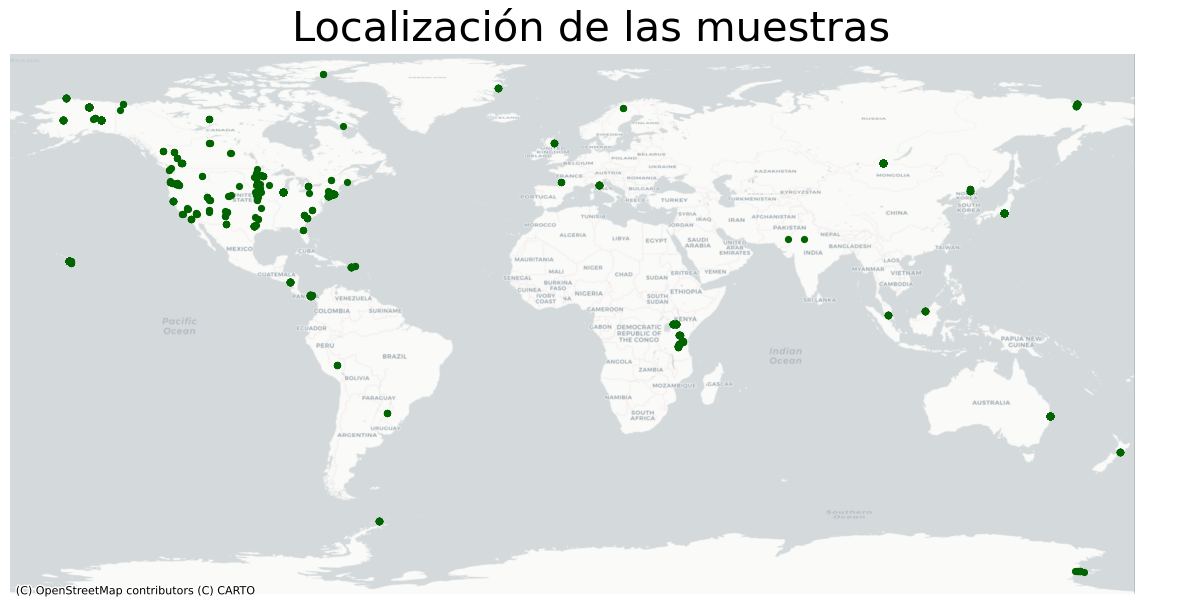

In [67]:
fig, ax = plt.subplots(1, figsize=(15, 15))

otus_con_gdf.plot(marker='.', c='darkgreen', ax=ax, markersize=70, zorder=1)

plt.title("Localización de las muestras",fontsize=30)

plt.axis("off")


ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')

#fig.savefig('coords.png', bbox_inches='tight', pad_inches=0)

**Localización y completitud de descripción de muestra**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


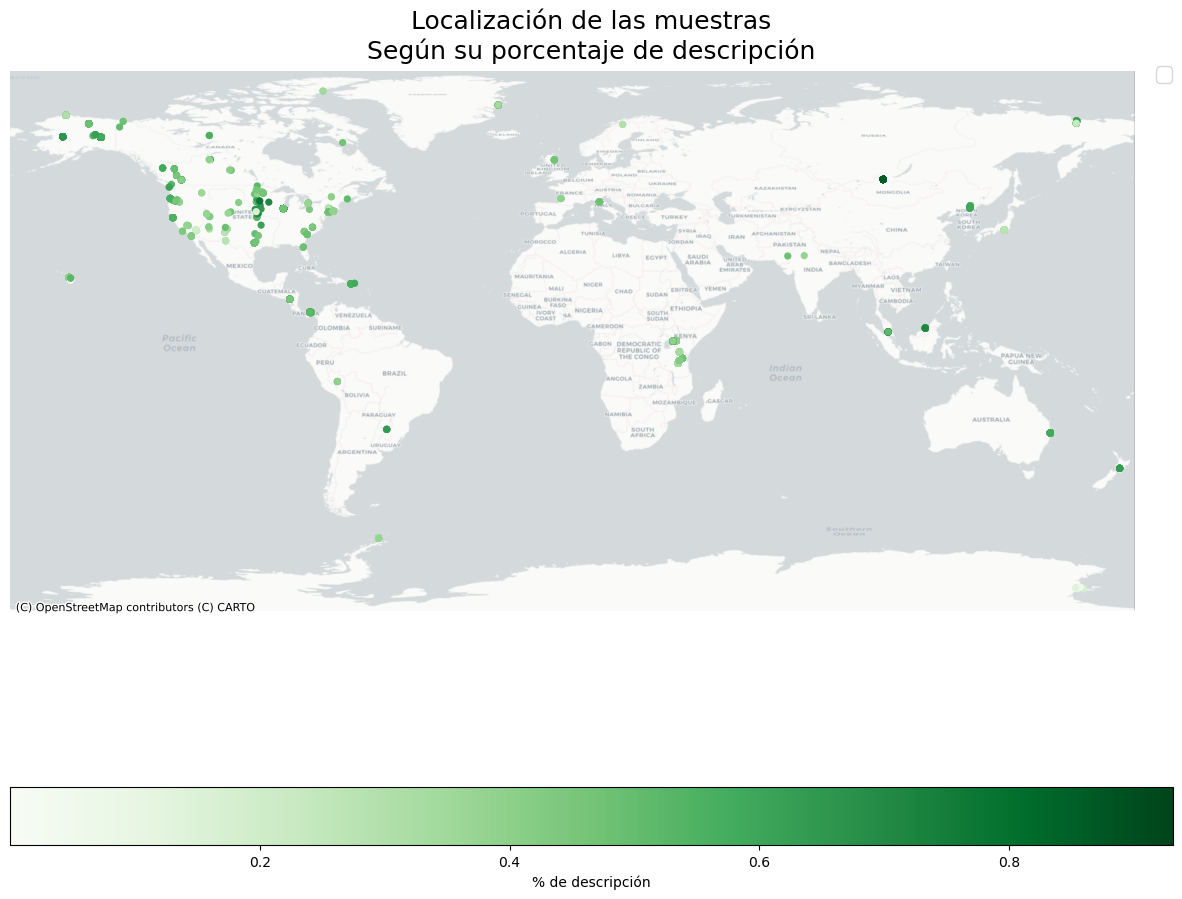

In [78]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 15))


otus_con_gdf.plot(marker='.', ax=ax, markersize=70, zorder=2, column="total_conteo", cmap="Greens", 
              legend=True, legend_kwds={'label': "%"+" de descripción",
                        'orientation': "horizontal"})

plt.title("Localización de las muestras\nSegún su porcentaje de descripción",fontsize=18)

plt.axis("off")

plt.legend(fontsize=15,borderaxespad=0.01)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')

#fig.savefig('coordsTempertura.png', bbox_inches='tight', pad_inches=0)

## Gráficas

**Distribución de *New_Labels***

In [83]:
otus_con.New_Labels.value_counts()

Snow-FullH-HotSum2        709
Snow-FullH-CoolSum8       321
WarmT-FullH-HotSum3       309
WarmT-FullH-HotSum2       284
Snow-WintDry-CoolSum7     228
Equat-FullH5              130
WarmT-FullH-HotSum6       126
WarmT-SumDry-WarmSum0      71
WarmT-FullH-WarmSum4       71
Equat-WintDry4             69
Snow-FullH-CoolSum3        69
Equat-Monsoonal2           67
WarmT-FullH-WarmSum10      67
Equat-WintDry2             62
Equat-FullH1               55
Equat-Monsoonal4           43
Polar-PolarTundra8         41
Polar-PolarFrost9          31
WarmT-Dessert-WarmSum4     31
WarmT-FullH-WarmSum2       28
Snow-FullH-WarmSum2        25
WarmT-FullH-WarmSum6       23
Arid-Steppe-HotArid4       23
Polar-PolarTundra10        22
Snow-WintDry-WarmSum3      22
Snow-FullH-CoolSum0        21
Snow-FullH-WarmSum0        20
Arid-Steppe-ColdArid0      12
Equat-FullH4               11
Polar-PolarFrost6          11
WarmT-SumDry-HotSum0        8
Arid-Dessert-ColdArid0      7
Arid-Dessert-HotArid0       5
Equat-Full

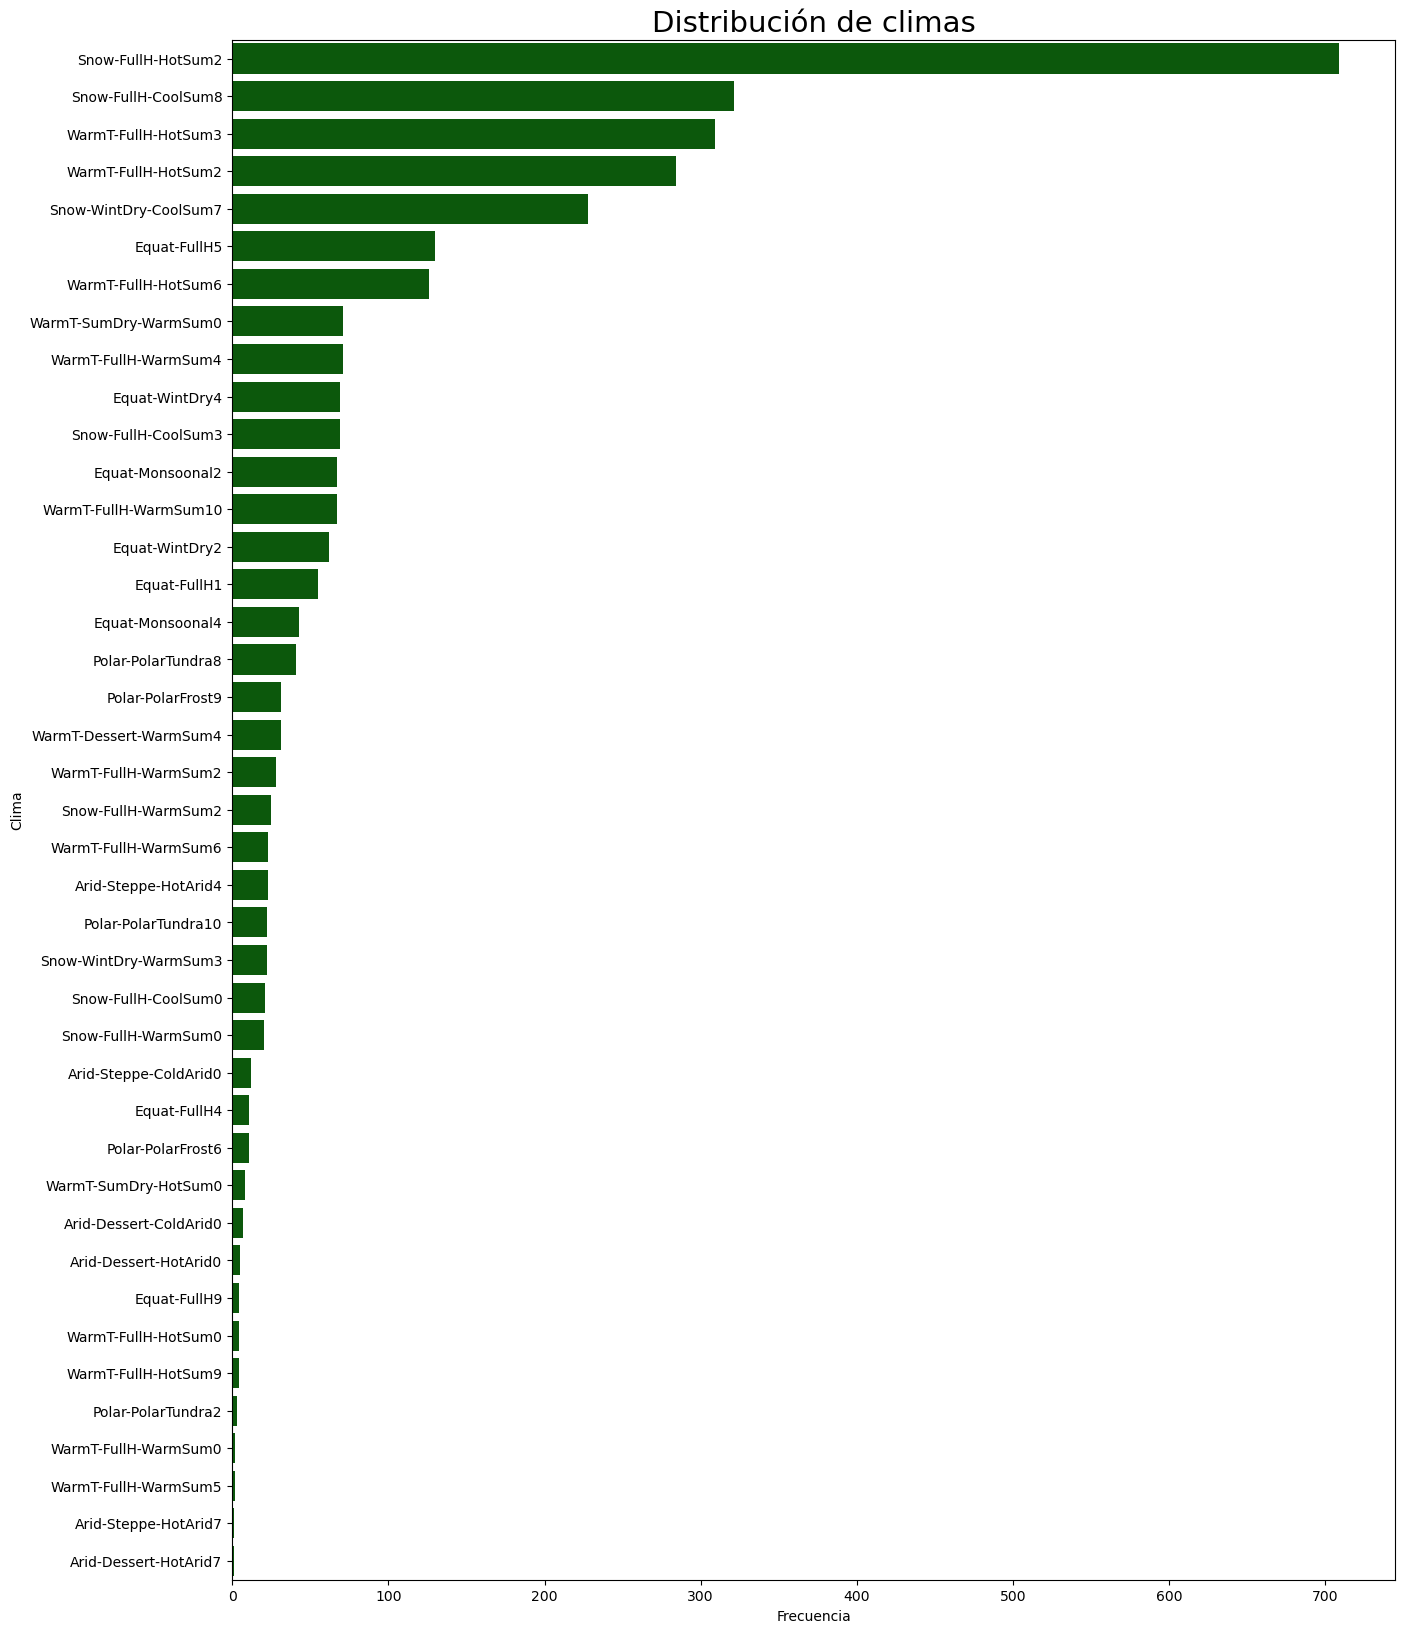

In [93]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 20))
sns.countplot(data=otus_con, y="New_Labels", order=otus_con.New_Labels.value_counts().index, color="darkgreen")
plt.xlabel("Frecuencia")
plt.ylabel("Clima")
plt.title("Distribución de climas", fontsize=21)
plt.show()